In [ ]:
# load the data
import pickle
import os

file_path = os.path.join('test_data', 'emptyCeiling.pkl')

with open(file_path, 'rb') as f:
    data = pickle.load(f)

expected_keys = {'frames', 'start_time', 'end_time', 'num_frames'}

if isinstance(data, dict) and expected_keys.issubset(data.keys()):
    frames = data['frames']
    start_time = data['start_time']
    end_time = data['end_time']
    num_frames = data['num_frames']

    print("Data loaded successfully.")
    print(f"Start time: {start_time}")
    print(f"End time: {end_time}")
    print(f"Number of frames: {num_frames}")
    print(f"Frames shape: {frames.shape}")
else:
    print("Data format mismatch. Expected a dictionary with keys:", expected_keys)


Data loaded successfully.
Start time: 2025-05-22T18:58:39.674507Z
End time: 2025-05-22T18:58:49.685815Z
Number of frames: 536
Frames shape: (536, 3, 4, 512)


In [ ]:
# load the data
import pickle
import os
import numpy as np

file_path = 'realtime_frames.pkl'

with open(file_path, 'rb') as f:
    frames = pickle.load(f)

frames = np.array(frames)
print(f"Frames shape: {frames.shape}")


Frames shape: (112, 3, 4, 512)


(112, 512)


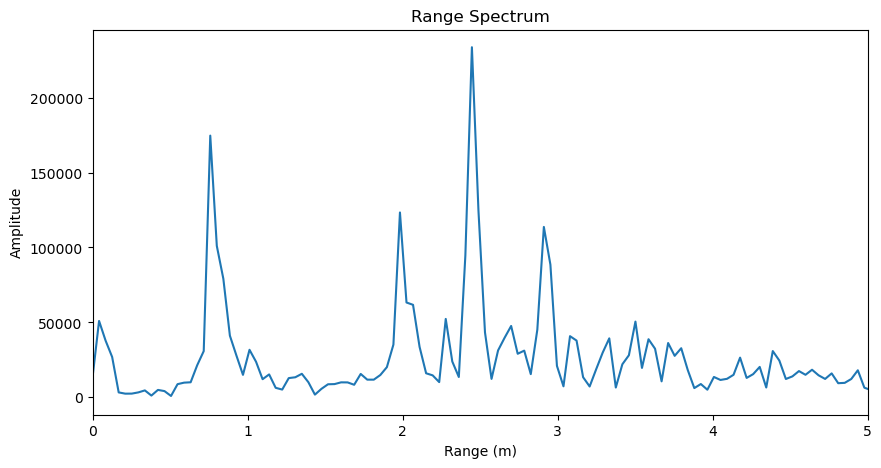

In [24]:
%matplotlib inline
from utils.range_spectrum import compute_range_spectrum
fps = 10

# plot range spectrum at frame 0
import matplotlib.pyplot as plt
import numpy as np

# new figure
fig = plt.figure(figsize=(10, 5))
# compute range spectrum
chs = np.squeeze(frames[:, 0, 0, :])
print(chs.shape)
range_meter, range_spectrum = compute_range_spectrum(chs[10])
# plot range values
plt.subplot(1, 1, 1)
plt.plot(range_meter, range_spectrum)
plt.title('Range Spectrum')
plt.xlabel('Range (m)')
plt.ylabel('Amplitude')
plt.xlim(0, 5)

plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from utils.range_spectrum import compute_range_spectrum
from IPython.display import HTML

# ch: shape should be (num_frames, num_samples)
ch = np.squeeze(frames[:, 0, 0, :])  # shape (num_frames, num_samples)
num_frames = ch.shape[0]

fig, ax = plt.subplots(figsize=(10, 5))
line, = ax.plot([], [], lw=2)
ax.set_title('Range Spectrum')
ax.set_xlabel('Range (m)')
ax.set_ylabel('Amplitude')

range_meter, _ = compute_range_spectrum(ch[0])
ax.set_xlim(range_meter.min(), range_meter.max())
ax.set_ylim(0, None)  

def init():
    line.set_data([], [])
    return line,

def update(frame_idx):
    range_meter, range_spectrum = compute_range_spectrum(ch[frame_idx])
    line.set_data(range_meter, range_spectrum)
    ax.set_ylim(0, np.max(range_spectrum) * 1.1) 
    return line,

ani = FuncAnimation(
    fig, update, frames=num_frames, init_func=init,
    blit=True, interval=1000 / fps
)

HTML(ani.to_jshtml())

    

<IPython.core.display.Javascript object>